<a href="https://colab.research.google.com/github/OSegun/Zummit-Africa-ML-AL-Projects/blob/main/ZA03_MNIST%20Digit%20Classification%20With%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digit Classification With Neural Network

The dataset used is an image preprocessed dataset from keras libary. The splited dataset are 60000 train and 10000 test of 28x28 dimension greyscale unique image dataset of values 0 to 9. Using activation function and four different layers of neural network to build and train the model to provide the best accuracy of predictions.

In [4]:
#import necessary libaries
import numpy as np
import seaborn as sns
import tensorflow as tf
tf.random.set_seed(3) # Use case of providing identical/similar numbers or values from the randominess in neutral network.
from tensorflow import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import cv2 # OpenCV libary for image recongnition or processing
from google.colab.patches import cv2_imshow # Exceptional case for the use of cv2 libary in google collab to display images
from keras.datasets import mnist # For getting the dataset to be used
from tensorflow.math import confusion_matrix

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # Loading the mnist image dataset from keras

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape) #60000 train dataset/grayscale images and 10000 test dataset/grayscale images of sizes 28x28 in numpy array

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


9


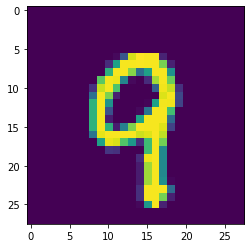

In [6]:
plt.imshow(X_train[350])
plt.show

print(Y_train[350])

In [ ]:
print(np.unique(Y_train))

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [7]:
# Transforming or scaling the grayscale values between 0 to 255 to values between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [8]:
print(X_train[350])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
# Building and setting up the layers of the neural network
model = keras.Sequential([
                      keras.layers.Flatten(input_shape=(28,28)),
                      keras.layers.Dense(50, activation='relu'),
                      keras.layers.Dense(50, activation='relu'),
                      keras.layers.Dense(10, activation='sigmoid')
                      ])

In [11]:
# Compling the neural network model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Training the neural networking model
history = model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3022 - accuracy: 0.9114
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1423 - accuracy: 0.9571
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1055 - accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0860 - accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0726 - accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0624 - accuracy: 0.9800
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0553 - accuracy: 0.9822
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0475 - accuracy: 0.9848
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0428 - accuracy: 0.9858
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.038

In [13]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1156 - accuracy: 0.9706
0.9706000089645386


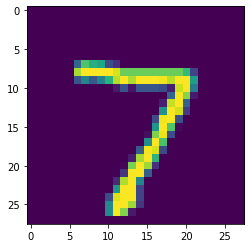

7


In [14]:
plt.imshow(X_test[0])
plt.show()

print(Y_test[0])

In [15]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
print(Y_pred.shape)
print(Y_pred[0])

(10000, 10)
[9.1233486e-03 2.9074966e-03 4.5177954e-01 9.5754510e-01 1.4114247e-04
 2.6098451e-02 2.7474195e-07 9.9998796e-01 4.2415315e-01 4.9952918e-01]


In [17]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [18]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [19]:
print(conf_mat)

tf.Tensor(
[[ 946    1    4    2    2    7    8    2    7    1]
 [   0 1127    3    1    0    1    0    0    3    0]
 [   1    5 1000    6    0    3    1    3   13    0]
 [   0    1    3  986    0    7    0    3    7    3]
 [   1    0    2    1  953    3    3    2    3   14]
 [   0    1    0   13    2  868    2    0    3    3]
 [   0    4    2    1    3   19  926    0    2    1]
 [   0    8    6    5    2    1    0  992    2   12]
 [   0    1    1    5    7   10    1    3  944    2]
 [   0    3    1    2   15   10    0    7    8  963]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

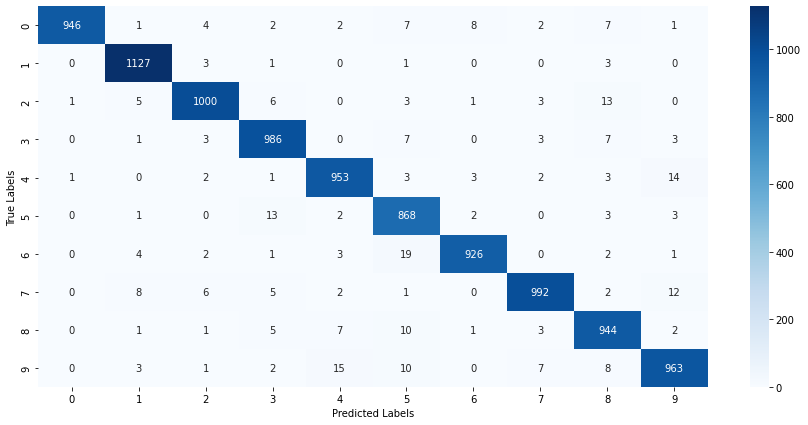

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

## Conclusion
Our MNIST Digit prediction model produce a strong accuracy model of 97% which I do believe is quite good, we can possibly increase the number of layers in the nural network to help us further push the accuracy to a 99%. 

The confusion matrix and the heatmap help tell us how well our prediction works with the actual labels. 